<a href="https://colab.research.google.com/github/Priyanshu7tiwary/ML/blob/main/football_pos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mplsoccer
import pandas as pd


In [5]:
from mplsoccer.pitch import Pitch, VerticalPitch
!pip install statsbombpy mplsoccer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.0 MB/s eta 0:00:00


In [6]:
from statsbombpy import sb


In [27]:
matches = sb.matches(competition_id=11, season_id=1)  # Example: La Liga 2018/19

# Find a specific match (e.g., Real Madrid vs Barcelona)
match_id = matches[(matches['home_team'] == 'Real Madrid') & (matches['away_team'] == 'Barcelona')].iloc[0]['match_id']
events = sb.events(match_id=match_id)
subs = events[events['type'] == 'Substitution']
subs.to_csv('match_subs.csv', index=False)
passes = events[events['type'] == 'Pass']
passes.to_csv('match_passes.csv', index=False)
print(subs.head())

     bad_behaviour_card ball_receipt_outcome ball_recovery_recovery_failure  \
4091                NaN                  NaN                            NaN   
4092                NaN                  NaN                            NaN   
4093                NaN                  NaN                            NaN   
4094                NaN                  NaN                            NaN   
4095                NaN                  NaN                            NaN   

     block_offensive carry_end_location clearance_aerial_won  \
4091             NaN                NaN                  NaN   
4092             NaN                NaN                  NaN   
4093             NaN                NaN                  NaN   
4094             NaN                NaN                  NaN   
4095             NaN                NaN                  NaN   

     clearance_body_part clearance_head clearance_left_foot  \
4091                 NaN            NaN                 NaN   
4092          

In [23]:
passes = pd.read_csv('match_passes.csv')

In [25]:
selected_columns = ['location', 'pass_end_location', 'pass_recipient_id','player_id','timestamp']
df=passes[selected_columns]
df.head()


,location,pass_end_location,pass_recipient_id,player_id,timestamp
0,"[61.0, 41.0]","[47.0, 38.0]",5203.0,5246.0,00:00:00.600
1,"[47.0, 40.0]","[33.0, 51.0]",5213.0,5203.0,00:00:02.600
2,"[33.0, 47.0]","[34.0, 35.0]",6332.0,5213.0,00:00:05.040
3,"[35.0, 26.0]","[35.0, 11.0]",5211.0,6332.0,00:00:07.000
4,"[32.0, 12.0]","[39.0, 20.0]",5203.0,5211.0,00:00:09.080


In [16]:
df.shape

(1092, 4)

K mean Clustering

In [52]:
end=df['pass_end_location']

In [55]:
df1=df['location']

In [99]:

df_concat_rows = pd.concat([df1, end], axis=0, ignore_index=True)
df_concat_rows.head()

,0
0,"[61.0, 41.0]"
1,"[47.0, 40.0]"
2,"[33.0, 47.0]"
3,"[35.0, 26.0]"
4,"[32.0, 12.0]"


In [85]:
df_concat_rows = pd.DataFrame(df_concat_rows)


In [100]:
df_concat_rows

,0
0,"[61.0, 41.0]"
1,"[47.0, 40.0]"
2,"[33.0, 47.0]"
3,"[35.0, 26.0]"
4,"[32.0, 12.0]"
...,...
2179,"[91.0, 67.0]"
2180,"[99.0, 79.0]"
2181,"[89.0, 66.0]"
2182,"[113.0, 68.0]"


In [132]:
df_concat_rows.head()

,pos,pos_length
0,"[61.0, 41.0]",None
1,"[47.0, 40.0]",None
2,"[33.0, 47.0]",None
3,"[35.0, 26.0]",None
4,"[32.0, 12.0]",None


In [134]:
df_concat_rows=df_concat_rows['pos']

In [135]:
df_concat_rows.head()

,pos
0,"[61.0, 41.0]"
1,"[47.0, 40.0]"
2,"[33.0, 47.0]"
3,"[35.0, 26.0]"
4,"[32.0, 12.0]"


In [139]:
df_from_series = pd.DataFrame(df_concat_rows, columns=['pos'])

In [149]:
print(df_from_series.head())

            pos
0  [61.0, 41.0]
1  [47.0, 40.0]
2  [33.0, 47.0]
3  [35.0, 26.0]
4  [32.0, 12.0]


In [152]:
df_from_series['pos'] = df_from_series['pos'].apply(ast.literal_eval)

In [153]:
import numpy as np
df_from_series['x'] = df_from_series['pos'].apply(lambda point: point[0])
df_from_series['y'] = df_from_series['pos'].apply(lambda point: point[1])

In [154]:
df_from_series.head()

,pos,x,y
0,"[61.0, 41.0]",61.0,41.0
1,"[47.0, 40.0]",47.0,40.0
2,"[33.0, 47.0]",33.0,47.0
3,"[35.0, 26.0]",35.0,26.0
4,"[32.0, 12.0]",32.0,12.0


In [156]:
X = np.column_stack((df_from_series['x'], df_from_series['y']))

In [157]:
print(X)

[[ 61.  41.]
 [ 47.  40.]
 [ 33.  47.]
 ...
 [ 89.  66.]
 [113.  68.]
 [104.  44.]]


In [159]:
from sklearn.mixture import GaussianMixture

# Fit GMM
gmm = GaussianMixture(n_components=10)  # Adjust n_components as needed
gmm.fit(X)

# Predict clusters
labels = gmm.predict(X)
print("Cluster labels:", labels)

Cluster labels: [9 2 2 ... 5 5 0]


visualization


In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

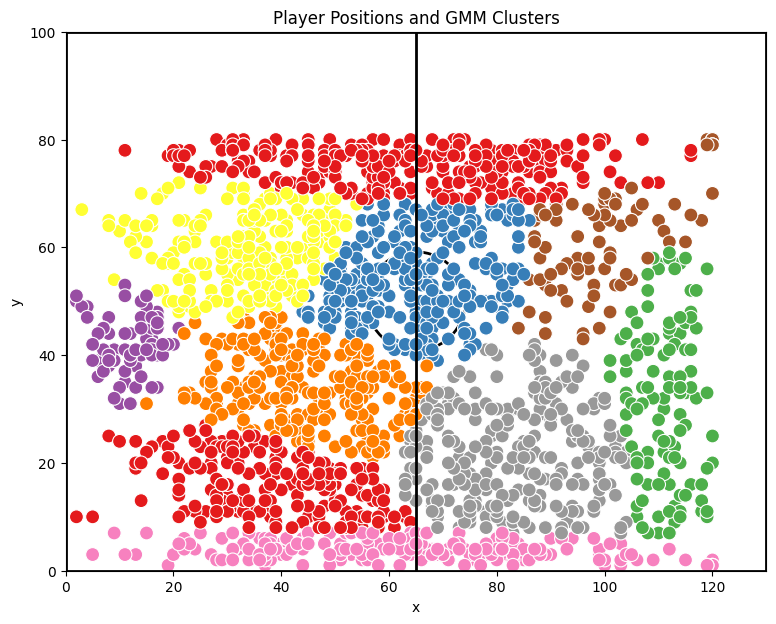

In [167]:


kmeans = KMeans(n_clusters=10, random_state=42)  # Set the number of clusters (n_clusters)
kmeans.fit(X)


labels = gmm.predict(X)


df_from_series['cluster'] = labels

# Function to plot a football pitch
def plot_pitch():
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot([0, 0], [0, 100], color="black", lw=2)
    ax.plot([0, 130], [100, 100], color="black", lw=2)
    ax.plot([130, 130], [100, 0], color="black", lw=2)
    ax.plot([130, 0], [0, 0], color="black", lw=2)
    ax.plot([65, 65], [0, 100], color="black", lw=2)
    center_circle = plt.Circle((65, 50), 9.15, color='black', fill=False, lw=2)
    ax.add_patch(center_circle)
    ax.set_xlim(0, 130)
    ax.set_ylim(0, 100)
    ax.set_aspect('equal')
    return ax


ax = plot_pitch()


sns.scatterplot(data=df_from_series, x='x', y='y', hue='cluster', palette='Set1', ax=ax, s=100, legend=None)
plt.title('Player Positions and GMM Clusters')
plt.show()

ValueError: Could not interpret value `labels` for `hue`. An entry with this name does not appear in `data`.

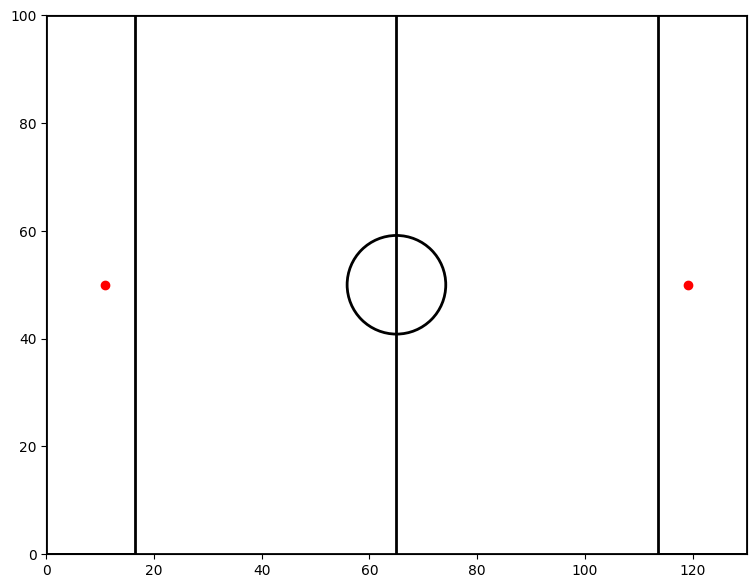